In [1]:
import re
import nltk
import string 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

In [2]:
train = pd.read_csv('Data/train_tweets.csv')
test = pd.read_csv('Data/test_tweets.csv')

In [3]:
train.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation

In [4]:
test.head()

id  \
0  31963   
1  31964   
2  31965   
3  31966   
4  31967   

                                                                                                                                            tweet  
0                                                      #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦   
1                                            @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why    
2                                                                         safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!   
3  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite  
4                                                     3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦

## Data Inspection

In [5]:
train[train['label'] ==0].head(10)

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   
5   6      0   
6   7      0   
7   8      0   
8   9      0   
9  10      0   

                                                                                                                                             tweet  
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                           factsguide: society now    #motivation  
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦  
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦   
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !

In [6]:
train[train['label'] ==1].head(10)

id  label  \
13    14      1   
14    15      1   
17    18      1   
23    24      1   
34    35      1   
56    57      1   
68    69      1   
77    78      1   
82    83      1   
111  112      1   

                                                                                                                                 tweet  
13                                                          @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14                               no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                                              retweet if you agree!   
23                                                                                     @user @user lumpy says i am a . prove it lumpy.  
34                            it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia   
56                                                                                             @user lets fight against  #love #peace   
68                      ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness    
77                                             @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦  
82                                                       how the #altright uses  &amp; insecurity to lure men into #whitesupremacy      
111  @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦

In [7]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [8]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

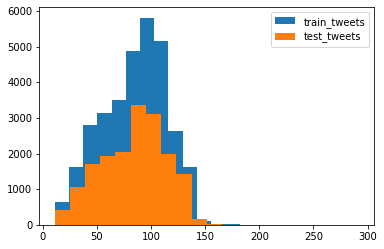

In [9]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label='train_tweets')
plt.hist(length_test, bins=20, label='test_tweets')
plt.legend()

## Data Cleaning

In [10]:
combi = train.append(test, ignore_index=True)

In [14]:
combi.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation

In [11]:
combi.shape

(49159, 3)

In [17]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [22]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], '@[\w]*')

In [23]:
combi.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                         tidy_tweet  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                            factsguide: society now    #motivation

In [49]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('[^a-zA-Z#]', ' ')

In [50]:
combi.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                         tidy_tweet  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run  
1    thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in ur                                        
4                                                                            factsguide  society now    #motivation

In [60]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [61]:
combi.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                      tidy_tweet  
0             when father dysfunctional selfish drags kids into dysfunction #run  
1  thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked  
2                                                            bihday your majesty  
3                                                     #model love take with time  
4                                                 factsguide society #motivation

In [65]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [66]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [67]:
from nltk.stem.porter import *

In [68]:
stemmer = PorterStemmer()

In [70]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [73]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [75]:
combi['tidy_tweet'] = tokenized_tweet

In [76]:
combi.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                               tidy_tweet  
0                when father dysfunct selfish drag kid into dysfunct #run  
1  thank #lyft credit caus they offer wheelchair van #disapoint #getthank  
2                                                     bihday your majesti  
3                                              #model love take with time  
4                                                factsguid societi #motiv

In [78]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

In [79]:
from wordcloud import WordCloud

In [82]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

(-0.5, 799.5, 499.5, -0.5)

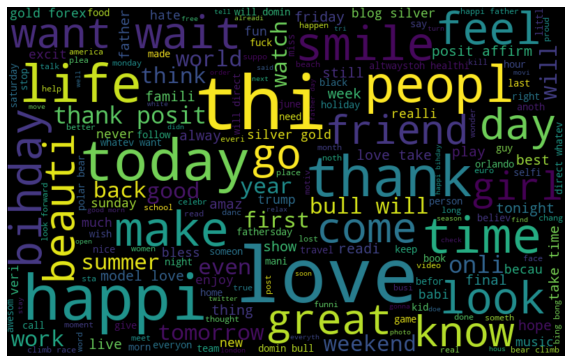

In [83]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [92]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])

In [94]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110, random_state=21).generate(normal_words)

(-0.5, 799.5, 499.5, -0.5)

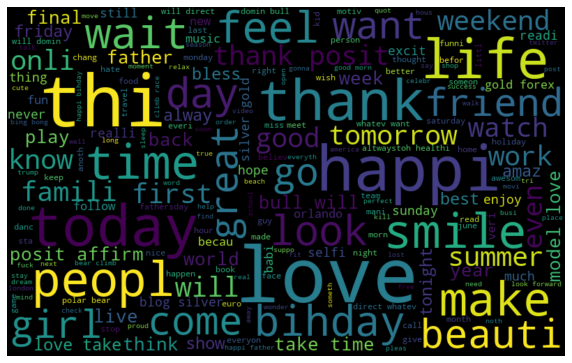

In [95]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [96]:
negative_word = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])

In [98]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_word)

(-0.5, 799.5, 499.5, -0.5)

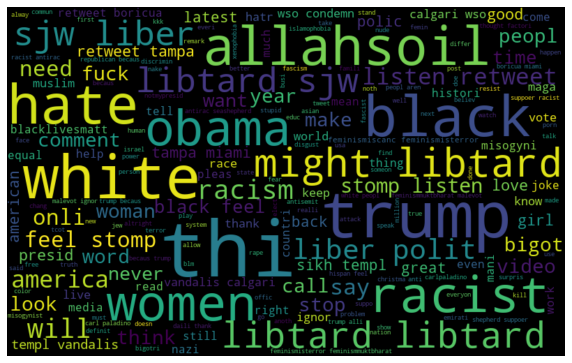

In [100]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [101]:
def hashtag_extract(x):
    hashtag = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtag.append(ht)
    return hashtag

In [104]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])

In [106]:
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [115]:
HT_regular = sum(HT_regular, [])

In [116]:
HT_negative = sum(HT_negative,[])

In [118]:
a = nltk.FreqDist(HT_regular)

In [121]:
a

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [125]:
d = pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})

In [128]:
d= d.nlargest(n=20, columns='Count')

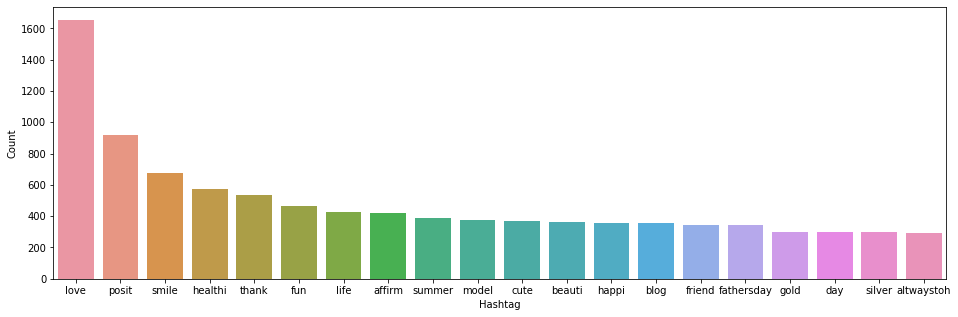

In [130]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x = 'Hashtag', y='Count')

In [133]:
b = nltk.FreqDist(HT_negative)

In [136]:
e = pd.DataFrame({'Hashtag':list(b.keys()), 'Count':list(b.values())})

In [139]:
e = e.nlargest(n=20, columns='Count')

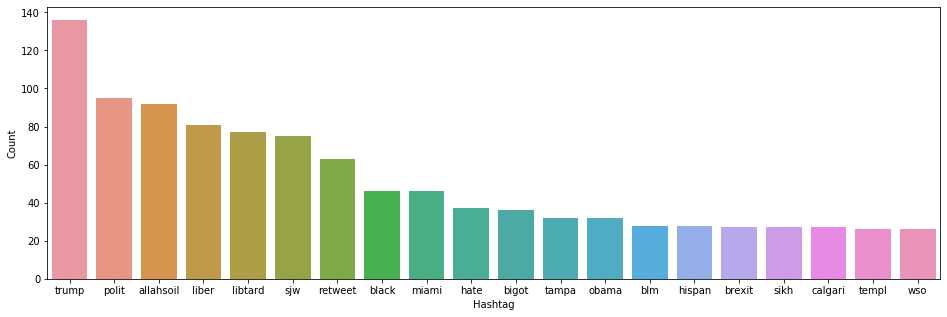

In [142]:
plt.figure(figsize=(16,5))
sns.barplot(data=e, x='Hashtag', y='Count')

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [146]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [148]:
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [149]:
bow.shape

(49159, 1000)

In [152]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.09, min_df=2, max_features=1000, stop_words='english')

In [153]:
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [154]:
tfidf.shape

(49159, 1000)

In [157]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [159]:
model_w2v= gensim.models.Word2Vec(tokenized_tweet, size=200, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)

In [160]:
model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)

(6510036, 7536020)

In [161]:
model_w2v.wv.most_similar(positive='dinner')

[('spaghetti', 0.558937132358551),
 ('cookout', 0.5515217781066895),
 ('spinach', 0.5482667088508606),
 ('#biall', 0.544356107711792),
 ('#avocado', 0.5411913990974426),
 ('noodl', 0.5358892679214478),
 ('#cellar', 0.5352861285209656),
 ('#pasta', 0.5288559198379517),
 ('fav', 0.5275892019271851),
 ('burrito', 0.5246036648750305)]

In [164]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5430634021759033),
 ('melo', 0.5402197241783142),
 ('#delegaterevolt', 0.5377125144004822),
 ('phoni', 0.5367693305015564),
 ('unstabl', 0.5237590074539185),
 ('tomlin', 0.5237492918968201),
 ('jibe', 0.5178046226501465),
 ('unfavor', 0.5151149034500122),
 ('nomine', 0.5136468410491943),
 ('businessman', 0.5082550048828125)]

In [166]:
model_w2v['food']

array([ 0.07010566,  0.30083448, -0.23217335, -0.51680285,  0.55705994,
        0.42040217, -0.44161215,  0.01207897,  0.10505447,  0.25211015,
       -0.40243462, -0.06996389, -0.4225315 , -0.51505125, -0.05102779,
       -0.10824329,  0.56093377,  0.18728781, -0.45848706,  0.5774758 ,
       -0.3886561 , -0.07781619, -0.41393286, -0.5093051 ,  0.3165846 ,
       -0.68904966, -0.5103769 ,  0.0328928 ,  0.2745583 , -0.50290304,
        0.23469839,  0.5929664 , -0.51305795,  0.2625467 , -0.11334909,
        0.28093082,  0.12941554, -0.28886878, -0.05796895, -0.18204662,
        0.11804019,  0.14558785, -1.318673  ,  0.4150864 , -0.2986932 ,
        0.07621858, -0.10430745, -0.23765719,  0.47399288,  0.03262778,
       -0.01365804,  0.8983708 ,  0.21903174,  0.568087  , -0.5824876 ,
       -0.35595694, -0.40981704, -0.286741  ,  0.12812418,  0.2089145 ,
       -0.08707803,  0.0552069 , -0.3268928 , -0.79717255,  0.3463148 ,
       -0.05220018,  0.11504973, -0.24988233, -0.00184805,  0.44

In [167]:
model_w2v.wv.most_similar(positive='food')

[('void', 0.5168429613113403),
 ('#desktweet', 0.5136400461196899),
 ('closur', 0.5099008083343506),
 ('obes', 0.500607967376709),
 ('#raw', 0.4977530539035797),
 ('yaaaay', 0.4976869821548462),
 ('patio', 0.49660611152648926),
 ('#doplant', 0.49258846044540405),
 ('alfredo', 0.4908519983291626),
 ('frenzi', 0.48179537057876587)]

In [172]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape(1, size)
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape(1, size)
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /=count
    return vec

In [175]:
wordvec_array = np.zeros((len(tokenized_tweet), 200))

In [177]:
for i in range(len(tokenized_tweet)):
    wordvec_array[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_array)

In [178]:
wordvec_df

0         1         2         3         4         5         6    \
0     -0.157685 -0.304519  0.292876  0.028267  0.171886  0.207465 -0.278955   
1     -0.009560 -0.287490  0.009537 -0.057069  0.092274 -0.078293 -0.132462   
2      0.144488 -0.025307 -0.118279 -0.185962  0.211612  0.759946 -0.208676   
3      0.162052 -0.361900 -0.125020  0.008090  0.408586  0.159631 -0.085448   
4      0.027003 -0.309863 -0.005168 -0.089730  0.199000 -0.097932 -0.070296   
...         ...       ...       ...       ...       ...       ...       ...   
49154  0.283707 -0.601470 -0.065656  0.000816 -0.170009 -0.162112  0.057528   
49155 -0.290172 -0.244394  0.161490 -0.022853  0.331758  0.057558 -0.375763   
49156  0.100379 -0.289642  0.378070 -0.195179  0.139969 -0.041286 -0.103098   
49157  0.420039 -0.365754  0.121176  0.356370  0.332852  0.598968 -0.233141   
49158 -0.138411 -0.161964 -0.114435 -0.100513 -0.029377  0.316862 -0.225670   

            7         8         9    ...       190       191       192  \
0     -0.003768  0.105842  0.079646  ... -0.558464 -0.191988 -0.260900   
1      0.052194 -0.057481  0.101147  ... -0.229090 -0.155331 -0.181326   
2     -0.126818  0.114180  0.023654  ...  0.125027 -0.228180 -0.127060   
3     -0.249778  0.010893  0.274138  ... -0.218733 -0.245100 -0.310411   
4     -0.025758  0.319143  0.110361  ... -0.535789 -0.405348 -0.071832   
...         ...       ...       ...  ...       ...       ...       ...   
49154  0.094738  0.325951 -0.058596  ... -0.124898 -0.426402 -0.515288   
49155  0.034867  0.183138  0.233055  ...  0.037423 -0.016826 -0.034733   
49156  0.037101  0.132719  0.352875  ... -0.302598 -0.340692 -0.111528   
49157  0.089514 -0.007364  0.183625  ... -0.345751  0.027253 -0.092264   
49158 -0.189819 -0.073815  0.136910  ... -0.055701 -0.343862  0.081141   

            193       194       195       196       197       198       199  
0     -0.063767  0.228413 -0.067787 -0.027140  0.196209 -0.036847  0.081791  
1      0.126445  0.153858  0.200662  0.003437  0.259874 -0.216385  0.224840  
2     -0.060913  0.176559  0.110682  0.007554 -0.074282  0.382538  0.399643  
3     -0.032220 -0.051314 -0.125149  0.033753 -0.090548 -0.191608  0.284981  
4      0.065853  0.338324  0.171951 -0.173434  0.227713 -0.281162 -0.035460  
...         ...       ...       ...       ...       ...       ...       ...  
49154  0.148916  0.440461  0.074732 -0.144094  0.318231 -0.131022  0.231357  
49155  0.081383  0.134755  0.162673  0.112334  0.169681 -0.008832  0.025571  
49156  0.177642  0.229051  0.045485  0.029120  0.290179  0.090277  0.237185  
49157  0.405966  0.392775  0.104582  0.033308 -0.010945 -0.168087 -0.354669  
49158  0.049190  0.308597  0.196155  0.131981  0.146417  0.042479  0.526043  

[49159 rows x 200 columns]

In [179]:
from tqdm import tqdm

In [181]:
tqdm.pandas(desc = 'progress-bar')

In [182]:
from gensim.models.doc2vec import LabeledSentence

In [183]:
def add_label(twt):
    output = []
    for i,s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" +str(i)]))
    return output

In [185]:
labeled_tweets = add_label(tokenized_tweet)

In [187]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [189]:
model_d2v = gensim.models.Doc2Vec(dm=1, dm_mean=1, size=200, window=5, negative=7, min_count=5, workers=3, alpha=0.1, seed=23)

In [192]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])


100%|██████████| 49159/49159 [00:00<00:00, 3141047.64it/s]


In [193]:
model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)

In [194]:
docvec_arrays = np.zeros((len(tokenized_tweet),200))

In [196]:
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

In [197]:
docvec_df = pd.DataFrame(docvec_arrays)

In [198]:
docvec_df

0         1         2         3         4         5         6    \
0     -0.175595 -0.140188 -0.089403  0.026962  0.202329 -0.488335  0.008057   
1     -0.202852  0.113276  0.226011  0.017412  0.177561  0.031438  0.211734   
2      0.066149 -0.011328  0.076857  0.227327  0.220241  0.013730  0.004229   
3     -0.047771 -0.103691  0.040446  0.274608  0.283513  0.083058 -0.003823   
4     -0.141927  0.072538  0.147352  0.128182  0.046002  0.048713 -0.081452   
...         ...       ...       ...       ...       ...       ...       ...   
49154 -0.029316 -0.098562  0.039747  0.241815  0.210888  0.098103 -0.042196   
49155  0.253071 -0.001876 -0.095826  0.132159 -0.017169  0.179131  0.155157   
49156  0.132263 -0.416920 -0.460193  0.050965  0.090148 -0.073099  0.428498   
49157 -0.048105 -0.182841  0.050728  0.193165  0.236890  0.070260 -0.014343   
49158  0.142624  0.182357 -0.046196  0.067398  0.192894 -0.002748 -0.056837   

            7         8         9    ...       190       191       192  \
0      0.164861 -0.062785  0.182000  ...  0.055620 -0.409991 -0.050971   
1      0.021928 -0.234677 -0.277854  ... -0.017081 -0.093146  0.121666   
2     -0.032041  0.010705 -0.033008  ... -0.024374 -0.171622  0.071809   
3     -0.108596 -0.129344 -0.022958  ... -0.140127 -0.206367  0.238404   
4     -0.039979 -0.092187 -0.041487  ...  0.029552  0.029487  0.242894   
...         ...       ...       ...  ...       ...       ...       ...   
49154 -0.109333 -0.069753  0.002957  ... -0.113950 -0.131123  0.140400   
49155 -0.032457  0.086209 -0.062231  ... -0.092404 -0.151175  0.203862   
49156 -0.311268 -0.188884 -0.026492  ... -0.400695  0.279976  0.391670   
49157 -0.021842 -0.071387  0.049890  ... -0.079376 -0.120950  0.176771   
49158  0.009111  0.192259  0.072658  ...  0.052658  0.053722 -0.208789   

            193       194       195       196       197       198       199  
0      0.150644  0.304645 -0.006199 -0.189685 -0.110002  0.103881  0.208516  
1     -0.170122 -0.019697  0.032407  0.383870 -0.136841  0.210129 -0.103793  
2     -0.083728  0.055823  0.105573  0.101103 -0.074379  0.132876 -0.052299  
3     -0.131471 -0.018549  0.129235  0.032362 -0.025589  0.272595 -0.012222  
4      0.003634  0.044493  0.098095  0.045069  0.101703  0.240439 -0.006804  
...         ...       ...       ...       ...       ...       ...       ...  
49154 -0.071184  0.019291  0.101532  0.029236 -0.076342  0.238437  0.011128  
49155 -0.275305 -0.144857  0.037149 -0.214842 -0.102532  0.103794  0.097819  
49156 -0.036656  0.381428  0.164201  0.018187 -0.592944 -0.037656  0.305149  
49157 -0.095863 -0.046652  0.125972  0.027247  0.009592  0.219225  0.000759  
49158  0.360667  0.226053  0.092229  0.066239 -0.029459  0.365430  0.110092  

[49159 rows x 200 columns]

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [201]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [207]:
xtrain_bow, xvalid_bow, ytrain, y_valid = train_test_split(train_bow, train['label'], random_state =42, test_size = 0.3)

In [208]:
lreg = LogisticRegression()

In [209]:
lreg.fit(xtrain_bow, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
prediction = lreg.predict_proba(xvalid_bow)

In [215]:
prediction_int = prediction[:,1] >0.3

In [219]:
prediction_int = prediction_int.astype(np.int)

In [225]:
f1_score(y_valid, prediction_int)

0.5303408146300915

In [229]:
test_pred = lreg.predict_proba(test_bow)

In [231]:
test_pred_int = test_pred[:,1]>0.3

In [233]:
test_pred_int = test_pred_int.astype(np.int)

In [235]:
test['label'] = test_pred_int

In [236]:
submission = test[['id', 'label']]

In [237]:
submission

id  label
0      31963      0
1      31964      0
2      31965      0
3      31966      0
4      31967      0
...      ...    ...
17192  49155      1
17193  49156      0
17194  49157      0
17195  49158      0
17196  49159      0

[17197 rows x 2 columns]

In [238]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

In [240]:
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[y_valid.index]

In [242]:
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
prediction = lreg.predict_proba(xvalid_tfidf)

In [244]:
prediction_int = prediction[:,1] >=0.3

In [245]:
prediction_int =prediction_int.astype(np.int)

In [246]:
f1_score(prediction_int, y_valid)

0.5435168738898756

In [247]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

In [250]:
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[y_valid.index,:]

In [251]:
lreg.fit(xtrain_w2v, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = lreg.predict_proba(xvalid_w2v) prediction_int = prediction[:,1] >= 0.3 prediction_int = prediction_int.astype(np.int) f1_score(yvalid, prediction_int)